In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import importlib
import data_cleaning
import matplotlib.pyplot as plt
from data_cleaning import df_from_movie_csv, TABLE_FORMATS
%matplotlib inline

In [4]:
TABLE_FORMATS.keys()

dict_keys(['bom.movie_gross', 'imdb.name.basics', 'imdb.title.basics', 'imdb.title.crew', 'imdb.title.principals', 'imdb.title.ratings', 'imdb.title.akas', 'rt.movie_info', 'rt.reviews', 'tmdb.movies', 'tn.movie_budgets'])

In [12]:
dfs = {}

for table_name in TABLE_FORMATS.keys():
    dfs[table_name] = df_from_movie_csv(table_name, rootdir='~/Projects/dc-ds/lectures/dc-ds-100719/module-1/week-3/project/data/')

## Basic dataframe info -- head & info

In [13]:
for df_name,movie_df in dfs.items():
    print(df_name,"\n",movie_df.head())

bom.movie_gross 
                                          title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  
imdb.name.basics 
                 primary_name  birth_year  death_year  \
nconst                                                 
nm0061671  Mary Ellen Bauder         NaN         NaN   
nm0061865       Joseph Bauer         NaN         NaN   
nm0062070         Bruce Baum         NaN         NaN   
nm0062195       Axel Baumann         NaN         NaN   
nm0062798        Pete Baxter         NaN    

In [14]:
for df_name,movie_df in dfs.items():
    print(f"\n{df_name}")
    print(movie_df.info())


bom.movie_gross
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None

imdb.name.basics
<class 'pandas.core.frame.DataFrame'>
Index: 606648 entries, nm0061671 to nm9993380
Data columns (total 5 columns):
primary_name          606648 non-null object
birth_year            82736 non-null float64
death_year            6783 non-null float64
primary_profession    555308 non-null object
known_for_titles      576444 non-null object
dtypes: float64(2), object(3)
memory usage: 27.8+ MB
None

imdb.title.basics
<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 5 columns):
primary_title      146144 non-null object
original_title     1

In [15]:
for df_name,movie_df in dfs.items():
    print(f"\n{df_name}")
    print(movie_df.describe())


bom.movie_gross
       domestic_gross         year
count    3.359000e+03  3387.000000
mean     2.874585e+07  2013.958075
std      6.698250e+07     2.478141
min      1.000000e+02  2010.000000
25%      1.200000e+05  2012.000000
50%      1.400000e+06  2014.000000
75%      2.790000e+07  2016.000000
max      9.367000e+08  2018.000000

imdb.name.basics
         birth_year   death_year
count  82736.000000  6783.000000
mean    1967.043826  2000.523367
std       22.122190    43.951530
min        1.000000    17.000000
25%     1957.000000  2001.000000
50%     1971.000000  2013.000000
75%     1981.000000  2016.000000
max     2014.000000  2019.000000

imdb.title.basics
          start_year  runtime_minutes
count  146144.000000    114405.000000
mean     2014.621798        86.187247
std         2.733583       166.360590
min      2010.000000         1.000000
25%      2012.000000        70.000000
50%      2015.000000        87.000000
75%      2017.000000        99.000000
max      2115.000000     51420

Limit the years

In [16]:
dfs['tmdb.movies'].release_date.describe()

count                   26517
unique                   3433
top       2010-01-01 00:00:00
freq                      269
first     1930-04-29 00:00:00
last      2020-12-25 00:00:00
Name: release_date, dtype: object

In [17]:
tmdb = dfs['tmdb.movies']
tmdb = tmdb[tmdb.release_date.dt.year > 2009]
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26291 entries, 12444 to 309885
Data columns (total 8 columns):
genre_ids            26291 non-null object
original_language    26291 non-null object
original_title       26291 non-null object
popularity           26291 non-null float64
release_date         26291 non-null datetime64[ns]
title                26291 non-null object
vote_average         26291 non-null float64
vote_count           26291 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 1.8+ MB


## Distribution of IMDB movie ratings

In [18]:
imdb_title_ratings = dfs['imdb.title.basics'].join(dfs['imdb.title.ratings'])

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_title'

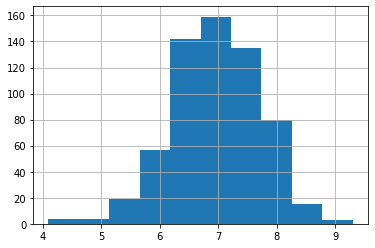

In [19]:
imdb_title_ratings[(imdb_title_ratings.numvotes > 100000)]['averagerating'].hist()
plt.set_title('Average ratings')

In [20]:
from split_data_fields import expand_df_split_fields
title_genres = expand_df_split_fields(dfs['imdb.title.basics'],'imdb.title.basics')

## Chaus's Updates start here***
analyzing genre data

In [22]:
# CHAU CHANGED THIS TO greater than 0 to just get all records for the dataframes below
top_movies = imdb_title_ratings[(imdb_title_ratings.numvotes > 0)].copy()
top_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73856 entries, tt0063540 to tt9916160
Data columns (total 7 columns):
primary_title      73856 non-null object
original_title     73856 non-null object
start_year         73856 non-null int64
runtime_minutes    66236 non-null float64
genres             73052 non-null object
averagerating      73856 non-null float64
numvotes           73856 non-null float64
dtypes: float64(3), int64(1), object(3)
memory usage: 4.5+ MB


Match most-rated IMDB movies to BOM data based on title. That gives us 520 movies.

In [1]:
imdb_bom_df = top_movies.reset_index().set_index('primary_title') \
                        .join(dfs['bom.movie_gross'].set_index('title'), how='inner') \
                        .reset_index().set_index('tconst')

NameError: name 'top_movies' is not defined

In [ ]:
# Find the studios that 
imdb_bom_df['ct'] = 1
imdb_bom_df.groupby('studio').count().sort_values(ascending=False, by='ct')
#imdb_bom_df

## Plot top 500 most-rated movies by domestic gross and rating

In [ ]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot()
sns.scatterplot(x=imdb_bom_df.averagerating,y=imdb_bom_df.domestic_gross)
ax.set_xlabel('average rating')
ax.set_ylabel('domestic gross')

In [ ]:
top_50k = imdb_title_ratings[(imdb_title_ratings.numvotes > 50000)].copy()

In [ ]:
imdb_bom_50k = top_50k.reset_index().set_index('primary_title') \
                        .join(dfs['bom.movie_gross'].set_index('title'), how='inner') \
                        .reset_index().set_index('tconst')

In [ ]:
imdb_bom_50k.info()

In [ ]:
imdb_bom_50k[imdb_bom_50k.numvotes < 100000]

In [ ]:
pd.set_option('display.max_rows',100)
imdb_bom_50k.groupby('studio').count().sort_values(by='index',ascending=False)

Is it easy to filter out foreign studios? We could look only at the most prolific studios or not worry about it. 

Match all the IMDB movies to BoxOfficeMojo set.

In [ ]:
imdb_bom_df_big = imdb_title_ratings.reset_index().set_index('primary_title') \
                        .join(dfs['bom.movie_gross'].set_index('title'), how='inner') \
                        .reset_index().set_index('tconst')

In [ ]:
imdb_bom_df_big.info()

In [ ]:
imdb_bom_df_big[~(imdb_bom_df_big.start_year == imdb_bom_df_big.year)]

In [ ]:
imdb_bom_df_big[(imdb_bom_df_big.numvotes>20000) & (imdb_bom_df_big.numvotes<50000)]

### Filtering by studios that have grossed at least a million dollars in the Box Office Mojo data.

In [ ]:
df = imdb_bom_df_big.copy()
df['ct'] = 1
pd.set_option('display.max_rows',300)
studios = df.groupby('studio').sum().sort_values(by='domestic_gross',ascending=False).query('domestic_gross > 1000000')

In [ ]:
studios.ct.sum()

In [ ]:
studios.info()

In [ ]:
studios.describe()

In [ ]:
imdb_bom_top_studios_df = imdb_bom_df_big[imdb_bom_df_big.studio.isin(list(studios.index))]

In [ ]:
imdb_bom_top_studios_df

In [ ]:
df = imdb_bom_top_studios_df
df

In [ ]:
title_genre_ratings = title_genres.join(dfs['imdb.title.ratings'])

In [ ]:
title_genre_ratings[(title_genre_ratings.numvotes > 100000) & (title_genre_ratings.genre == 'Action')] \
                   .averagerating.hist(by=title_genre_ratings['genre'])

This actually sort of appears to work:

In [ ]:
title_genre_ratings[title_genre_ratings.numvotes > 100000].groupby('genre').averagerating.hist();